## Regression Metrics

Regression metrics are essential tools for assessing the performance of models predicting continuous values. This notebook explores several regression metrics, including R², Adjusted R², Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Akaike Information Criterion (AIC).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

# Load California housing dataset
cal_housing = fetch_california_housing(as_frame=True)
X, y = cal_housing.data, cal_housing.target

# Use only 'MedInc' as a single feature for regression
X_small = X[['MedInc']]
X_train, X_test, y_train, y_test = train_test_split(X_small, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


### Visualizing the Regression Line

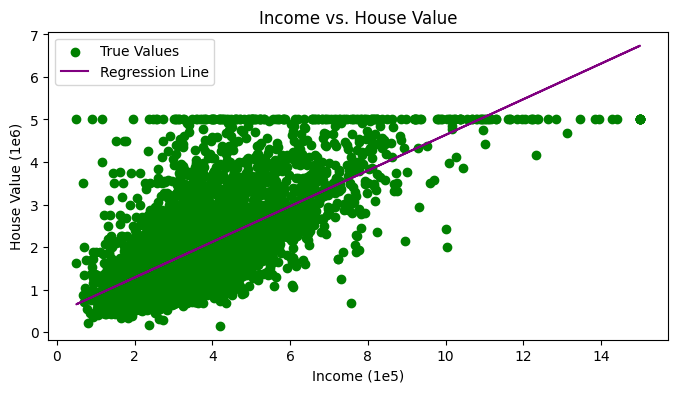

In [3]:
# Scatter plot of true vs. predicted values
plt.figure(figsize=(8, 4))
plt.scatter(X_test, y_test, color="green", label="True Values")
plt.plot(X_test, y_pred, color="purple", label="Regression Line")
plt.title("Income vs. House Value")
plt.xlabel("Income (1e5)")
plt.ylabel("House Value (1e6)")
plt.legend()
plt.show()



---

### 3. R² and Adjusted R²

#### **R²**
R² measures the proportion of variance in the dependent variable explained by the independent variable(s). 

Formula:  

$R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}$

- **RSS (Residual Sum of Squares):** Sum of squared residuals (errors).
- **TSS (Total Sum of Squares):** Total variability of the dataset.

#### **Adjusted R²**
Adjusted R² adjusts R² by penalizing the inclusion of unnecessary features.

Formula:  

$R_{adj}^2 = 1 - \left(\frac{(1 - R^2)(n - 1)}{n - k - 1}\right)$

Where:  
- \(n\): Number of observations.  
- \(k\): Number of features.

In [4]:
def adjusted_r2(X, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    n = y_true.shape[0]
    k = X.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Calculate R² and Adjusted R²
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(X_test, y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")


R²: 0.4589
Adjusted R²: 0.4587


---

### Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

#### **MSE**  
MSE calculates the average of squared differences between actual and predicted values:  
$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$

#### **RMSE**  
RMSE is the square root of MSE, making it interpretable in the same units as the target variable:  
$\text{RMSE} = \sqrt{\text{MSE}}$


In [5]:
# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


MSE: 0.7091
RMSE: 0.8421



### Akaike Information Criterion (AIC)

#### **AIC**  
AIC is a model selection criterion that balances model fit and complexity. A lower AIC indicates a better model.  

Formula:  
$\text{AIC} = 2k - 2\ln(\hat{L})$  
Where:  
- \(k\): Number of model parameters.  
- $\ln(\hat{L})$: Log-likelihood of the model.

For linear regression, log-likelihood can be approximated as:
$\ln(\hat{L}) = -\frac{n}{2} \ln(2\pi \text{MSE}) - \frac{n}{2}$


In [6]:
def aic(X, y_true, y_pred):
    n = len(y_true)
    mse = mean_squared_error(y_true, y_pred)
    k = X.shape[1] + 1  # Number of predictors + intercept
    log_likelihood = -n / 2 * (np.log(2 * np.pi * mse) + 1)
    return 2 * k - 2 * log_likelihood

# Calculate AIC
aic_value = aic(X_test, y_test, y_pred)
print(f"AIC: {aic_value:.4f}")


AIC: 10299.8124


## Summary of Metrics

In [7]:
print("Summary of Regression Metrics:")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"AIC: {aic_value:.4f}")


Summary of Regression Metrics:
R²: 0.4589
Adjusted R²: 0.4587
MSE: 0.7091
RMSE: 0.8421
AIC: 10299.8124
